# 探索多个特征之间的关系


知道数据集的基本信息对我们建模有用。

我们以Kaggle2017年举办的Two Sigma Connect: Rental Listing Inquiries竞赛数据为例进行数据集探索分析。
可以参考kernel中更多数据分析示例：https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries/kernels
竞赛官网：https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries/data

首先 import 必要的模块

In [47]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 读取数据

In [48]:
# path to where the data lies
dpath = './data/'
train = pd.read_json(dpath +"RentListingInquries_train.json")
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


检查数据规模
读取测试数据

In [49]:
print("Train :", train.shape)

('Train :', (49352, 15))


## 数据集中的变量信息

In [50]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [51]:
##Describe gives statistical information about numerical columns in the dataset
#train.describe()

In [52]:
### ... check for NAs
#train.isnull().sum()

## 查看每个变量的分布

在Python中，有很多数据可视化途径。因为这种多样性，造成很难选择。
比较常见的可视化工具有：
　　Pandas
　　Seaborn
　　ggplot
　　Bokeh
　　pygal
Matplotlib非常强大，也很复杂。你可以使用它做几乎所有的事情，然而，它并不是很易于学习。
很多工具(尤其是Pandas和Seaborn)都对它进行了封装。
pandas提供内置的图表功能，可使用pandas.DataFrame画各种图形。Pandas对于简单绘图，可以随手用，但你需要学习定制matplotlib。
Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。

http://seaborn.pydata.org/tutorial.html

### 类别标签y：interest level

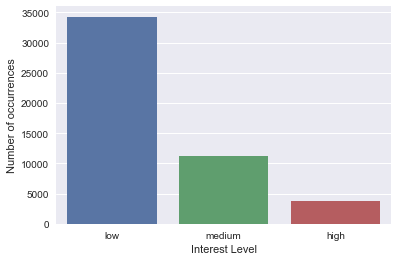

In [53]:
sns.countplot(train.interest_level, order=['low', 'medium', 'high']);
plt.xlabel('Interest Level');
plt.ylabel('Number of occurrences');

In [54]:
### Quantitative substitute of Interest Level
train['interest'] = np.where(train.interest_level=='low', 0,
                                  np.where(train.interest_level=='medium', 1, 2))

然后来看看数值型特征：
bathrooms，
bedrooms，
price

bathrooms 和bedrooms特征的取值集合较小，seaborn.countplot画分布图
price可能的取值多，用seaborn.distplott画分布图

### bathrooms特征
对每个特征，我们可以先看其散点图，然后看直方图，再结合二者看看是否有噪声点
还可以观察直方图/核密度估计的结果和常见分布是否吻合

用散点图看看数据点的分布：scatter
散点图有时会重叠，所以打点时有某种随机的jitter

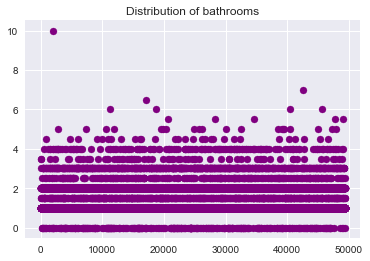

In [55]:
plt.scatter(range(train.shape[0]), train["bathrooms"].values,color='purple')
plt.title("Distribution of bathrooms");

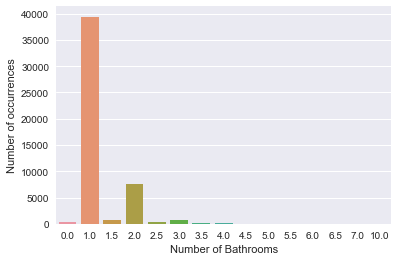

In [56]:
fig = plt.figure()
### Number of occurrences
sns.countplot(train.bathrooms);
plt.xlabel('Number of Bathrooms');
plt.ylabel('Number of occurrences');


从散点图可以看出有一个房子有10个浴室，可能是个噪声点（公寓有超过10个浴室的？，输入错误，应该是1？）
（从直方图也可以看出超过4个bathroom的房子很少，也可以将超过4个浴室的房子都认为是噪声点，可以条用drop函数抛弃这些数据点）


In [57]:
#ulimit = np.percentile(train.bathrooms.values, 99.5)
ulimit = 4
train['bathrooms'].loc[train['bathrooms']>ulimit] = ulimit

# 作业来了！！！
请给出对特征bedrooms的分析

### Price特征

散点图

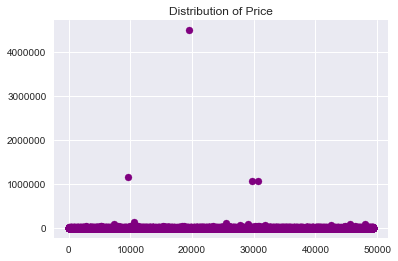

In [58]:
plt.scatter(range(train.shape[0]), train["price"].values,color='purple')
plt.title("Distribution of Price");

看来price特征也有噪声点

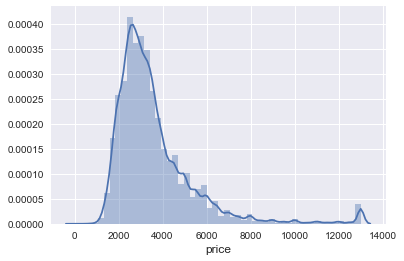

In [59]:
ulimit = np.percentile(train.price.values, 99)
#ulimit =  1000000
train['price'].loc[train['price']>ulimit] = ulimit

sns.distplot(train.price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

可以看出，该分布为right skewed。

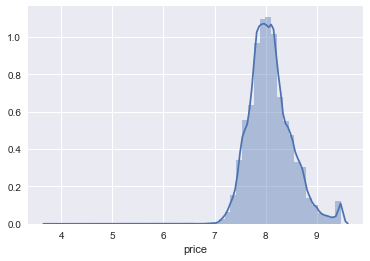

In [60]:
plt.figure()
sns.distplot(np.log1p(train["price"]))

## 查看两个变量的关系
1. 散点图
2. 联合分布（直方图、核密度估计）
3. 相关系数
4. 互信息

### bathrooms & interest_level

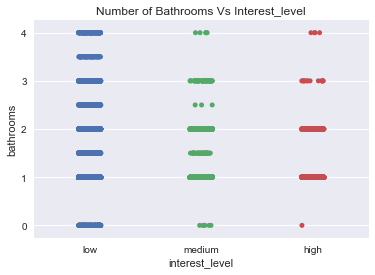

In [61]:
order = ['low', 'medium', 'high']
sns.stripplot(train["interest_level"],train["bathrooms"],jitter=True,order=order)
plt.title("Number of Bathrooms Vs Interest_level");

不同Interest_level下的bathrooms的分布好像有些不同

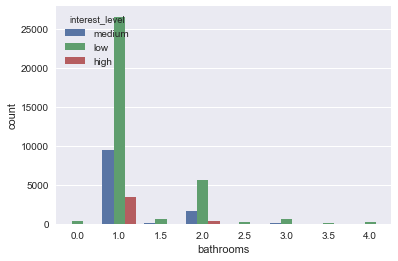

In [62]:
sns.countplot(x="bathrooms", hue="interest_level",data=train);

### price & interest_level

查看price与标签之间的关系

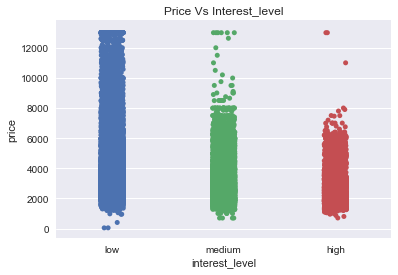

In [63]:
order = ['low', 'medium', 'high']
sns.stripplot(train["interest_level"],train["price"],jitter=True,order=order)
plt.title("Price Vs Interest_level");

low interest的price看起来均匀分布，medium和high的price更多在1500-8000之间

violinplot提供在不同类别条件下特征更多的分布信息：
核密度估计（KDE）
三个四分位数quartile（1/4，1/2， 3/4）
1.5倍四分位间距(nterquartile range，IQR)：
IQR：第三四分位数和第一四分位数的区别（即Q1~Q3 的差距），表示变量分散情形，比方差更稳健的统计量

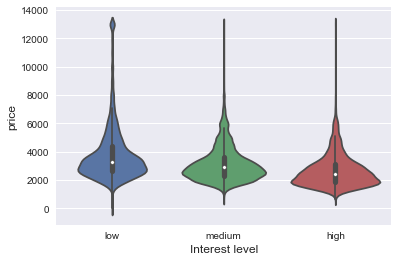

In [64]:
order = ['low', 'medium', 'high']
sns.violinplot(x='interest_level', y='price', data=train, order = order)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

### bathrooms & price

## 特征之间的相关性

In [65]:
contFeatureslist = []
contFeatureslist.append("bathrooms")
contFeatureslist.append("bedrooms")
contFeatureslist.append("price")

print(contFeatureslist)

['bathrooms', 'bedrooms', 'price']


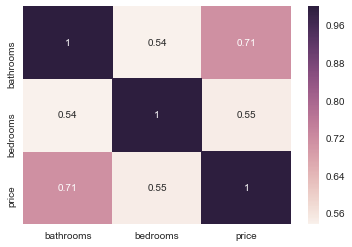

In [66]:
correlationMatrix = train[contFeatureslist].corr().abs()

plt.subplots()
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

这三个特征之间的相关性都超过了0.5，强相关
根据常识和相关性，可以设计出新特征：price/bathrooms...

## 还可以试试特征与目标的互信息